# Part 1 Visualization

In [57]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates

file_path = 'modified_standard_tweets.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)

def convert_to_float(value):
    if 'k' in value:
        return float(value.replace('k', '').replace(',', '.')) * 1000
    return float(value.replace(',', '.'))

df['shares'] = df['shares'].astype(str).apply(convert_to_float)
df['likes'] = df['likes'].astype(str).apply(convert_to_float)

df['post_date'] = pd.to_datetime(df['post_date'])
daily_summary = df.groupby(df['post_date']).agg({
    'shares': 'sum',
    'likes': 'sum',
    'status_text': 'count'
}).rename(columns={'status_text': 'post_count'}).reset_index()



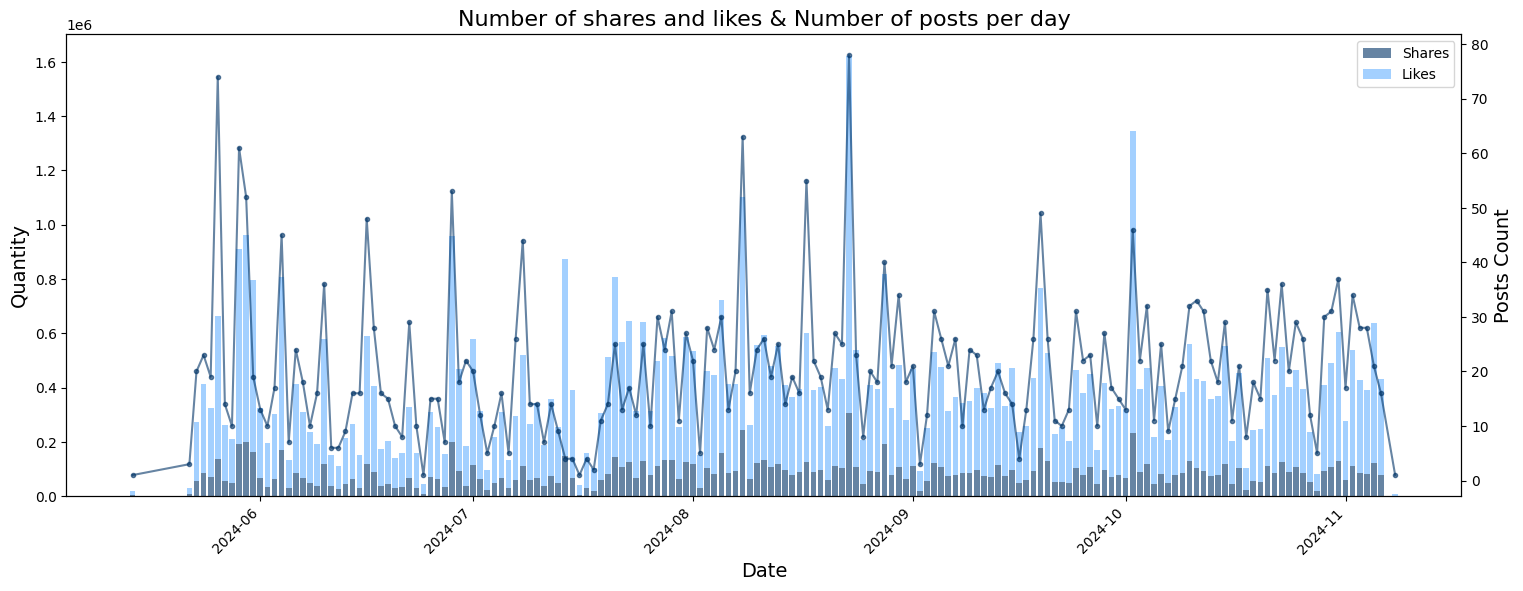

In [58]:



fig, ax1 = plt.subplots(figsize=(18, 6))
ax1.bar(daily_summary['post_date'], daily_summary['shares'], label='Shares', alpha=0.6, color='#003366')
ax1.bar(daily_summary['post_date'], daily_summary['likes'], label='Likes', alpha=0.6, bottom=daily_summary['shares'], color='#66B2FF')


ax1.set_title('Number of shares and likes & Number of posts per day', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Quantity', fontsize=14)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
ax2.plot(daily_summary['post_date'], daily_summary['post_count'], label='Posts Count', marker='o', markersize=3,alpha=0.6,color ='#003366')
ax2.set_ylabel('Posts Count', fontsize=14)
ax2.tick_params(axis='y')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())


plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.legend()
plt.savefig('daily_summary_chart.png', bbox_inches='tight')
plt.show()

In [41]:
daily_summary['heat_score'] = daily_summary['shares'] * 0.1/1000000 + daily_summary['post_count'] * 0.9
top_20_dates = daily_summary.nlargest(20, 'heat_score')
print(top_20_dates[['post_date']])

     post_date
94  2024-08-23
5   2024-05-26
79  2024-08-08
8   2024-05-29
88  2024-08-17
38  2024-06-28
9   2024-05-30
121 2024-09-19
26  2024-06-16
134 2024-10-02
14  2024-06-04
48  2024-07-08
99  2024-08-28
163 2024-10-31
155 2024-10-23
20  2024-06-10
153 2024-10-21
165 2024-11-02
101 2024-08-30
143 2024-10-11


I searched for the events that occurred on the dates mentioned above using a search engine and found that the above method can indicate the occurrence of major events to some extent. The selected events are as follows:



**Important Events happened on above key dates Related to the 2024 U.S. Election, Based on Reports from ABC, BBC, CNN, and The New York Times:**

1. **May 26, 2024**:
   - Biden delivered a speech to graduates at West Point, emphasizing national security and future challenges [1](https://www.nytimes.com/issue/todayspaper/2024/05/26/todays-new-york-times).

2. **May 29, 2024**:
   - Biden campaigned in Philadelphia, trying to gain support from Black voters, while Trump faced legal pressures [2](https://www.cnn.com/2024/05/29/us/5-things-to-know-for-may-29-severe-weather-trump-trial-gaza-bird-flu-south-africa-election/index.html).

3. **June 4, 2024**:
   - The Biden administration considered closing the border in response to the immigration crisis [3](https://www.cnn.com/2024/06/04/us/5-things-to-know-for-june-4-hunter-biden-india-election-covid-19-heat-dome-middle-east/index.html).

4. **June 16, 2024**:
   - Progressive Democrats worked to save a challenged candidate, reflecting internal party unrest [4](https://www.nytimes.com/issue/todayspaper/2024/06/16/todays-new-york-times).

5. **June 28, 2024**:
   - The presidential debate between Biden and Trump garnered widespread attention, with criticism of Biden's performance [5](https://www.nytimes.com/issue/todayspaper/2024/06/28/todays-new-york-times).
   - There was unease within the Democratic Party regarding Biden's performance and electoral prospects [5](https://www.cnn.com/2024/06/28/us/5-things-to-know-for-june-28-debate-recap-religious-freedom-uvalde-mobile-outage-peru-earthquake/index.html).

6. **July 8, 2024**:
   - Trump stated in an interview that he was waiting to see if Biden would continue his campaign [6](https://www.nytimes.com/issue/todayspaper/2024/07/08/todays-new-york-times).
   - Biden faced pressure from within the party to consider not running for re-election [6](https://www.cnn.com/politics/live-news/election-2024-campaign-news-07-08-24/index.html).

7. **August 8, 2024**:
   - Vice President Harris campaigned in Michigan, while Trump held a press conference, intensifying competition in key states [7](https://www.cnn.com/politics/live-news/harris-trump-election-08-08-24/index.html).
   - Harris emphasized her economic policies, trying to attract voter support [7](https://www.nytimes.com/issue/todayspaper/2024/08/08/todays-new-york-times).

8. **August 17, 2024**:
   - Trump held a rally in Pennsylvania, and Harris conducted a bus tour, both vying for votes in crucial states [8](https://www.cnn.com/politics/live-news/trump-harris-election-08-17-24/index.html).
   - Harris detailed her economic plan, aiming to attract more voters [8](https://www.nytimes.com/issue/todayspaper/2024/08/17/todays-new-york-times).

9. **August 23, 2024**:
   - Trump and Robert F. Kennedy Jr. appeared together at a rally in Arizona, where Kennedy announced a pause in his independent campaign [9](https://www.cnn.com/politics/live-news/dnc-harris-trump-campaign-news-08-23-24/index.html).
   - This rally was seen as a crucial moment for Trump to regain support [9](https://www.nytimes.com/issue/todayspaper/2024/08/23/todays-new-york-times).

10. **August 28, 2024**:
    - Trump faced new legal challenges, accused of misconduct during the election period [10](https://www.nytimes.com/issue/todayspaper/2024/08/28/todays-new-york-times).

11. **September 19, 2024**:
    - With less than 50 days until the presidential election, Trump and Harris continued to seek voter support in their campaigns [11](https://www.cnn.com/politics/live-news/trump-harris-presidential-election-09-19-24/index.html).

12. **October 11, 2024**:
    - Recent polls showed Trump gaining support in key states, raising concerns within the Democratic Party about the electoral situation [12](https://www.nytimes.com/issue/todayspaper/2024/10/11/todays-new-york-times).
    - Trump and Harris made final efforts to win over voters in their campaigns [12](https://www.cnn.com/politics/live-news/trump-harris-election-10-11-24/index.html).

13. **October 21, 2024**:
    - Harris portrayed Trump as unfit for the presidency during her campaign, reflecting the Democratic Party's anxiety about the election [13](https://www.nytimes.com/issue/todayspaper/2024/10/21/todays-new-york-times).
    - Both sides intensified their activities in key swing states to secure final voter support [13](https://www.cnn.com/politics/live-news/trump-harris-election-10-21-24/index.html).

14. **October 23, 2024**:
    - Tensions in the Middle East escalated, with Trump emphasizing the importance of national security during his campaign [14](https://www.nytimes.com/issue/todayspaper/2024/10/23/todays-new-york-times).
    - Legal issues continued to impact Trump's campaign [14](https://www.cnn.com/world/live-news/israel-iran-lebanon-gaza-war-10-23-24-intl-hnk/index.html).

15. **October 31, 2024**:
    - With only five days until election day, Trump and Harris conducted final campaigning efforts in key states [15](https://www.cnn.com/politics/live-news/trump-harris-election-10-31-24/index.html).
    - The atmosphere before the election intensified, with rising interest in the election outcomes [15](https://www.nytimes.com/issue/todayspaper/2024/10/31/todays-new-york-times).

16. **November 2, 2024**:
    - Candidates held multiple rallies in a final push for voter support before the election [16](https://www.cnn.com/politics/live-news/trump-harris-election-11-02-24/index.html).
    - Voter enthusiasm was high, expected to significantly impact the election results [16](https://www.nytimes.com/live/2024/11/02/us/trump-harris-election).




# Part 2 Word cloud

Next, I selected the three days with the highest number of posts from the above filtered dates for word cloud analysis

In [45]:
top_3_by_post_count = top_20_dates.nlargest(3, 'post_count')

# 打印结果
print(top_3_by_post_count[['post_date', 'post_count', 'heat_score']])

    post_date  post_count  heat_score
94 2024-08-23          78   70.230536
5  2024-05-26          74   66.613600
79 2024-08-08          63   56.724178


In [53]:
import json

json_file_path = 'modified_standard_tweets.json'
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

dates_to_extract = [ '2024-05-26', '2024-08-08','2024-08-23']

extracted_status_texts = {date: [] for date in dates_to_extract}

for entry in data:
    post_date = entry['post_date']
    if post_date in dates_to_extract:
        extracted_status_texts[post_date].append(entry['status_text'])


joined_status_texts = {date: ' '.join(texts) for date, texts in extracted_status_texts.items()}

for date, texts in joined_status_texts.items():
    print(f"{date}:\n{texts}\n")

2024-05-26:
The reason I didn’t file paperwork for the Libertarian Nomination, which I would have absolutely gotten if I wanted it (as everyone could tell by the enthusiasm of the Crowd last night!), was the fact that, as the Republican Nominee, I am not allowed to have the Nomination of another Party. Regardless, I believe I will get a Majority of the Libertarian Votes. Junior’ Kennedy is a Radical Left Democrat, who’s destroyed everything he’s touched, especially in New York and New England, and in particular, as it relates to the Cost and Practicality of Energy. He’s not a Libertarian. Only a FOOL would vote for him! Passing over the Charlotte Motor Speedway now - Very exciting! DJT Congressman Bill Huizenga is a fantastic representative for the incredible people of Michigan’s 4th Congressional District.A successful entrepreneur, Bill is fighting to Reduce the federal government, Lower Inflation, Create good-paying Jobs, Secure the Border, Defend our Great Military / Vets, and defen

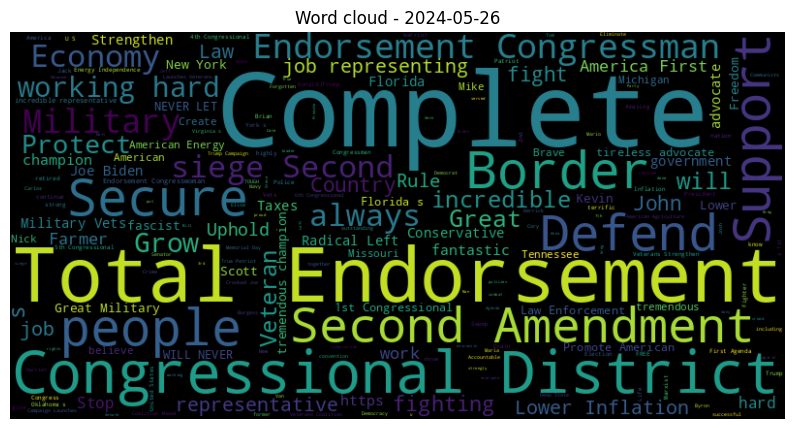

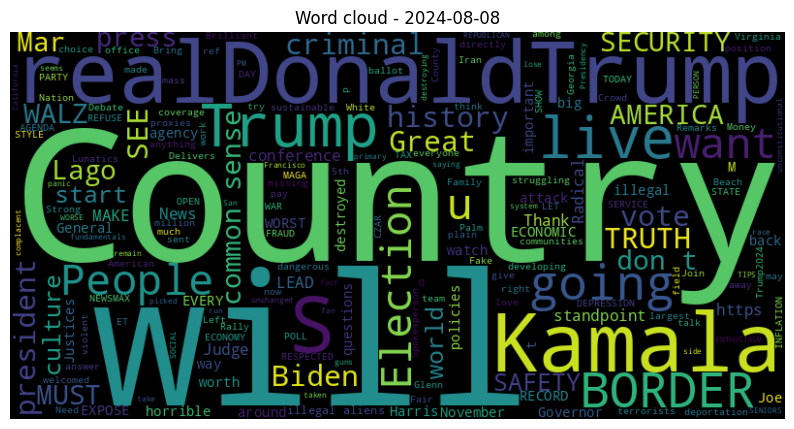

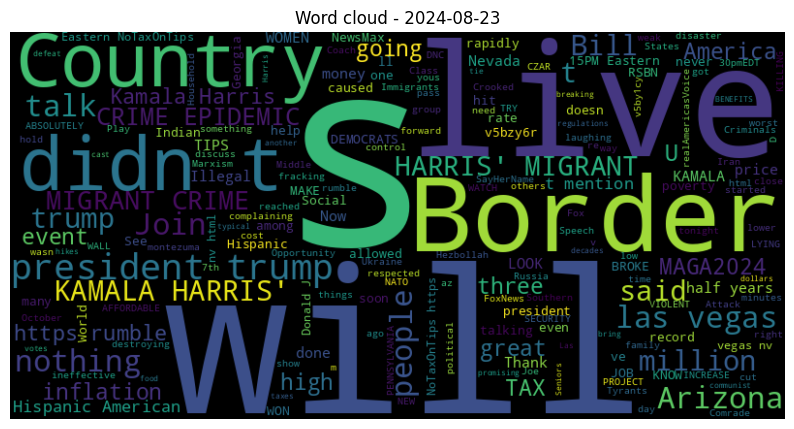

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, date):
    wordcloud = WordCloud( width=800, height=400).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word cloud - {date}')
    plt.savefig(f'wordcloud_{date}.png', bbox_inches='tight')
    plt.show()

for date, text in joined_status_texts.items():
    generate_wordcloud(text, date)